In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os

# Import the MFI library 
import MFI_lib2D as lib2
import MFI_class2D

# Set the path to the notebook and the data folder (and figures folder if needed)
if 'path_notebook' not in globals(): path_notebook = os.getcwd()
print("The path to the notebook is:", path_notebook)

if 'path_data' not in globals():
    if not os.path.isdir("_data_temp/convergence_analysis2/"): print("\nThe data folder \"_data_temp/convergence_analysis/\" does not exist. Creating new folder."); os.mkdir(path_notebook + "/_data_temp/convergence_analysis/"); 
    path_data = path_notebook + "/_data_temp/convergence_analysis/"
print("The data folder is:", path_data)
# path_figures = "/home/ucecabj/Pictures/MFI_figures/"

# Set the plotting parameters
for _plt_parameters_ in [0]:
    from matplotlib import rc
    plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["Helvetica"], "font.size": 12, "axes.titleweight": "bold"})
    plw = 0.6  # width of (box line, tick line, ...)
    plt.rcParams.update({"axes.linewidth": plw, "figure.figsize": (4,3)}) 
    plt.rcParams.update({"xtick.top": True, "xtick.direction": "in", "xtick.major.width": plw, "xtick.minor.width": plw, "xtick.minor.visible": True, "xtick.major.size": 5})
    plt.rcParams.update({"ytick.right": True, "ytick.direction": "in", "ytick.major.width": plw, "ytick.minor.width": plw, "ytick.minor.visible": True, "ytick.major.size": 5})


The path to the notebook is: /home/ucecabj/Desktop/MFI_git/MFI_class2D
The data folder is: /home/ucecabj/Desktop/MFI_git/MFI_class2D/_data_temp/convergence_analysis/


### Define Potential and default parameters

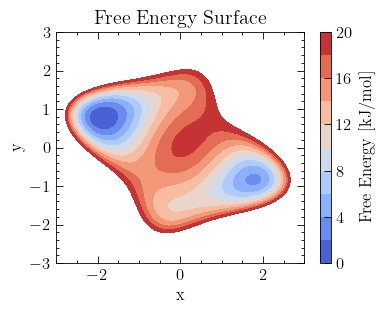

In [2]:
# Define the grid, the potential, the string of the potential and the FES cutoff
grid = np.linspace(-3, 3, 100); 
X, Y = np.meshgrid(grid, grid)
inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
dinve_pot_dy, dinve_pot_dx = np.gradient(inve_pot, grid, grid)
inve_pot = inve_pot - np.min(inve_pot)
inve_pot_string = "1.34549*x^4+1.90211*x^3*y+3.92705*x^2*y^2-6.44246*x^2-1.90211*x*y^3+5.58721*x*y+1.33481*x+1.34549*y^4-5.55754*y^2+0.904586*y+18.5598"
FES_cutoff = 20

# Define plumed grid
[plX, plY, pl_min, pl_max, pl_n, pl_extra] = lib2.get_plumed_grid_2D(X, Y, [-4,-4], [4,4])

# plot the free energy surface
plt.contourf(X, Y, inve_pot, levels=np.linspace(0, FES_cutoff, 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Free Energy Surface"); plt.show()

# Stimulation path
path_invernizzi = path_data + "Invernizzi_Potential/"

In [3]:
# default parameters for the MFI class
default_params = {  "X":X, "Y":Y, "Z":inve_pot, "bw":[0.1, 0.1], "dZ_dX":dinve_pot_dx, "dZ_dY":dinve_pot_dy,
                    "plX":plX, "plY":plY, "simulation_steps":1_000_000, 
                    "position_pace":20, "n_pos_per_window":10, "metad_pace":200, "metad_width":[0.1, 0.1], "metad_height":3, "biasfactor":10,
                    "Bias_sf":1, "gaus_filter_sigma":None,
                    "FES_cutoff":FES_cutoff, # "calculate_FES_st_dev":True, "bootstrap_iter":50,
                    "record_maps":True, "record_forces_e":False, "simulation_folder_path": path_invernizzi, "ID":"", 					
                    }
                  

### Exploration stage

| 100% | AAD: 1.287 [kJ/mol] | Total time: 3 sec                                                            


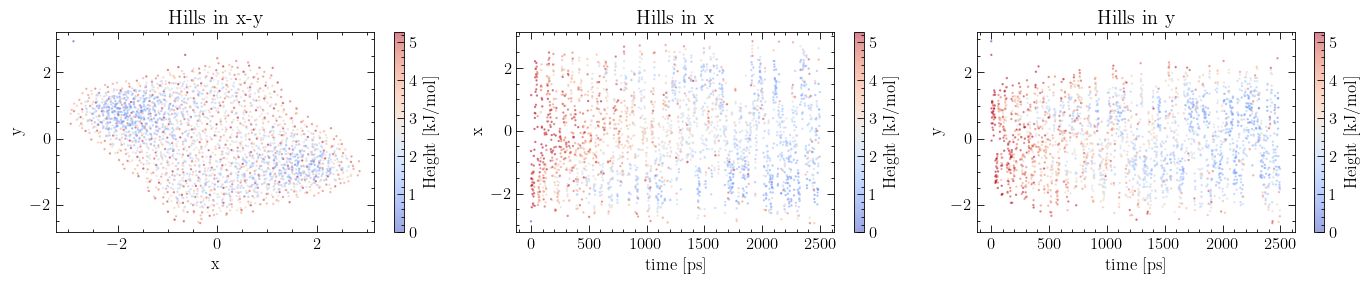

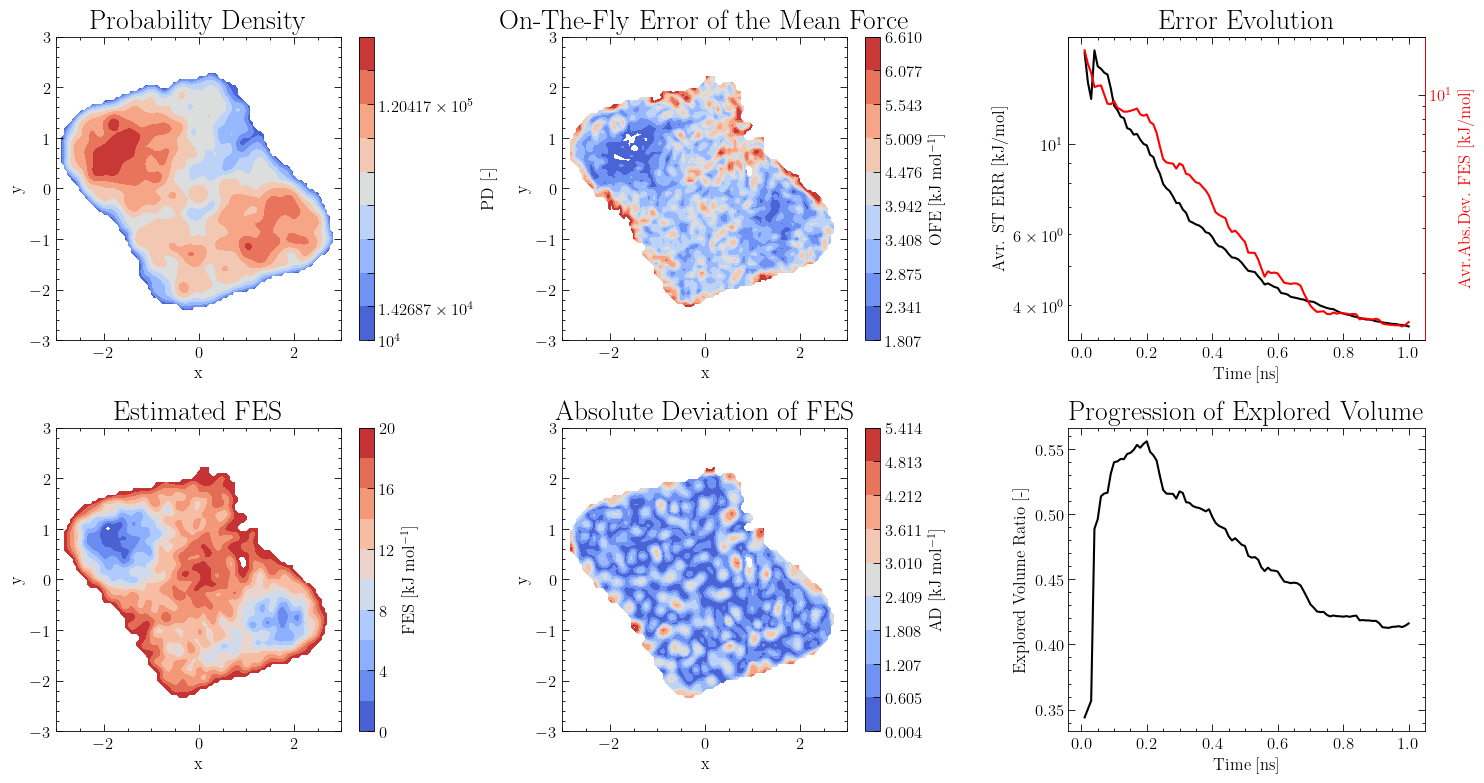

ready to show


In [4]:
new_params = {**default_params}
new_params.update({"simulation_steps":500_000, "ID":"_inve"})
new_params.update({"metad_height":5, "biasfactor":20, "metad_width":[0.1, 0.1], "bw":[0.1, 0.1]})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":None, "n_pos":10_000, "record_forces_e":True})

MFI = MFI_class2D.MFI2D(**new_params)

# MFI.run_simulation()

MFI.analyse_data()

lib2.plot_hills_trajectory(MFI.hills)
MFI.plot_results()
lib2.plot_3D_plotly(MFI.X, MFI.Y, MFI.Z + MFI.Bias, range_min=0, range_max=50)

t1, v1, aofe1, aad1 = MFI.Avr_Error_list[:,0], MFI.Avr_Error_list[:,1], MFI.Avr_Error_list[:,2], MFI.Avr_Error_list[:, MFI.Avr_Error_info.index("AAD")]
base_force_terms, base_time, base_fes, base_forces_e_list = MFI.force_terms, MFI.sim_time, MFI.FES, MFI.forces_e_list


| 100% | AAD: 0.862 [kJ/mol] | Total time: 60 sec                                                            


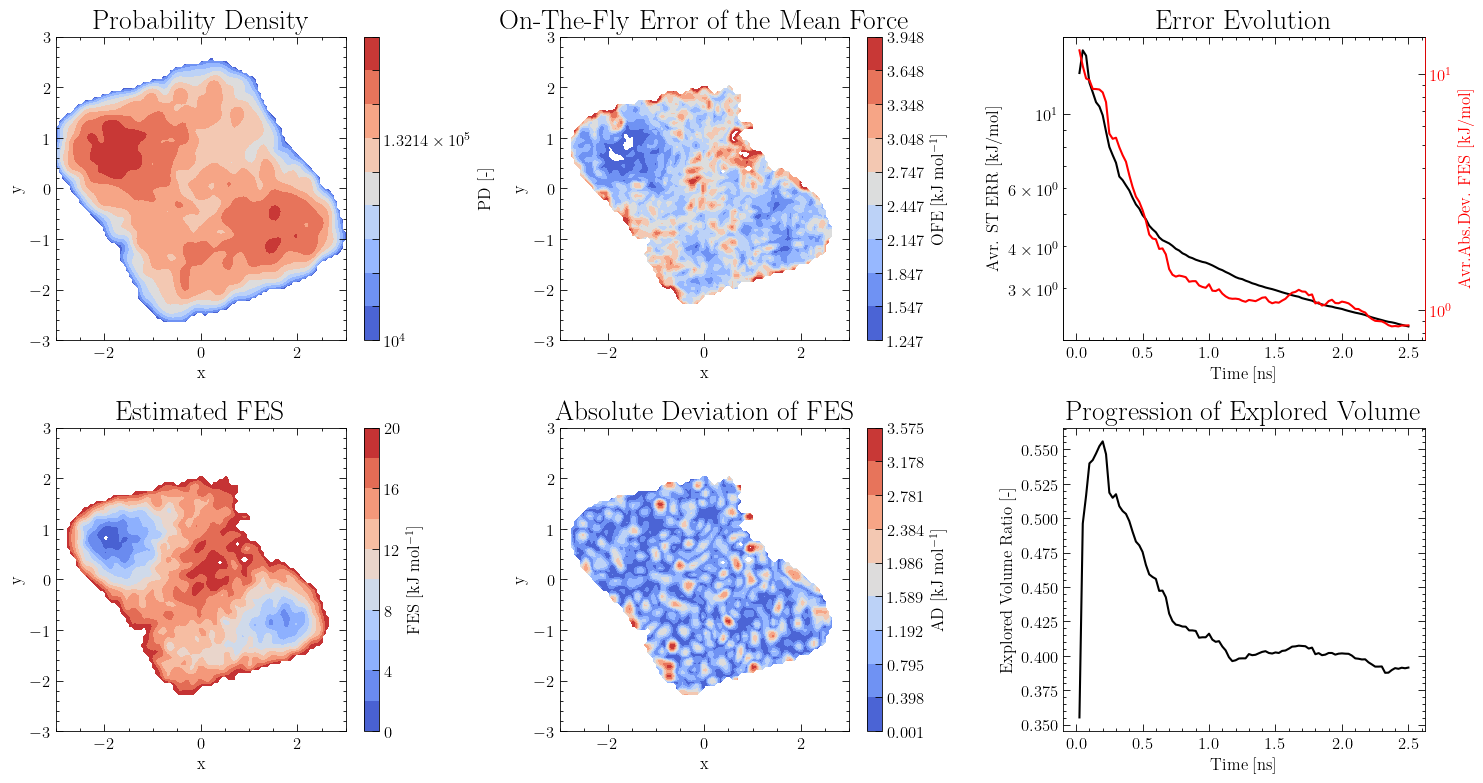

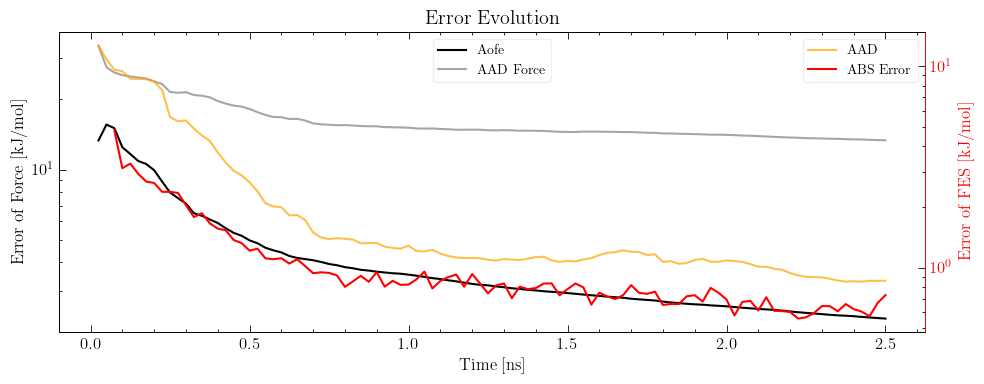

In [78]:
new_params = {**default_params}
new_params.update({"simulation_steps":500_000, "ID":"_inve"})
new_params.update({"metad_height":5, "biasfactor":20, "metad_width":[0.1, 0.1]})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":50})#, "n_pos":10_000})

MFI = MFI_class2D.MFI2D(**new_params)

# MFI.run_simulation()

MFI.analyse_data()

MFI.plot_results()
MFI.plot_errors()


### MetaD stage

#### 1st simulation

| 100% | AAD: 0.838 [kJ/mol] | Total time: 1.0 min : 24 sec                                                            


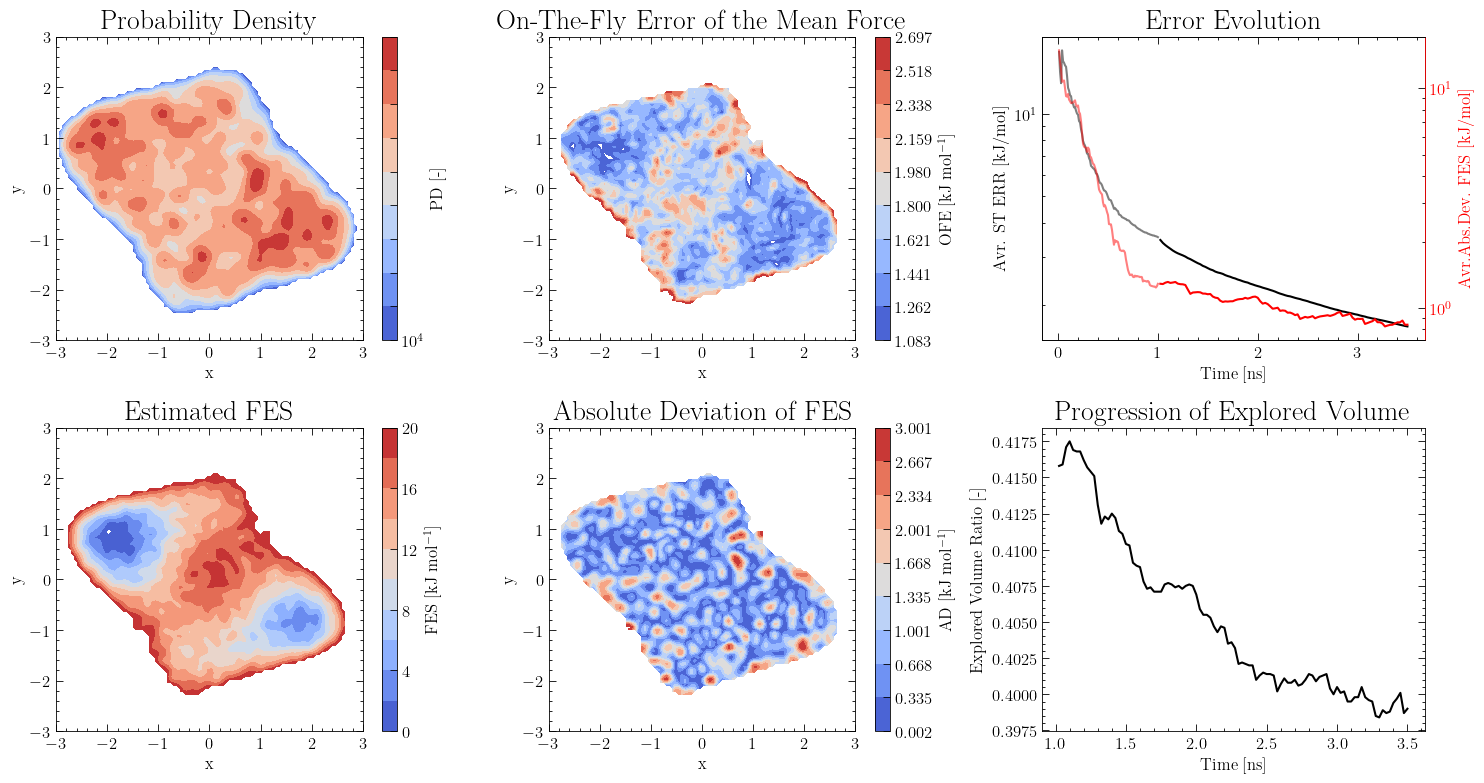

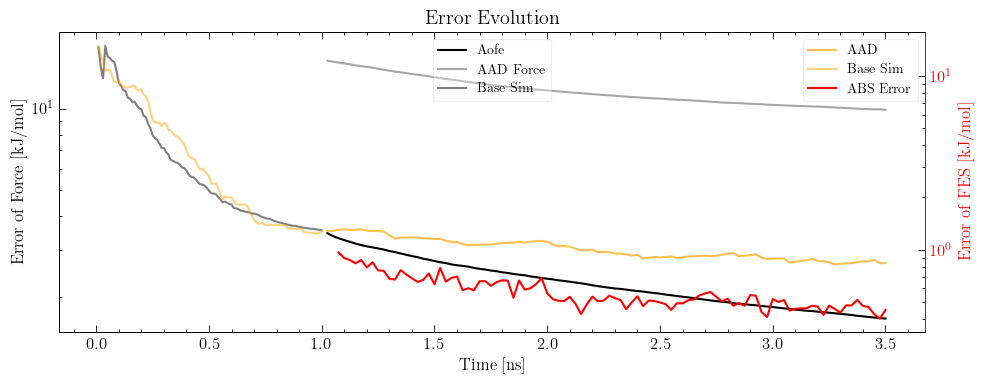

In [10]:
new_params = {**default_params}
new_params.update({"simulation_steps":500_000, "ID":"_inve_2_1"})
new_params.update({"metad_height":3, "biasfactor":3, "metad_width":[0.1, 0.1], "bw":[0.1, 0.1]})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":100})#, "n_pos":10_000})
new_params.update({"base_forces":base_force_terms, "base_time":base_time, "base_forces_e_list":base_forces_e_list})

MFI_2_1 = MFI_class2D.MFI2D(**new_params)

MFI_2_1.make_external_bias(FES=base_fes)

# MFI_2_1.run_simulation()

MFI_2_1.analyse_data()

# lib2.plot_hills_trajectory(MFI_2_1.hills)
MFI_2_1.plot_results(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])
MFI_2_1.plot_errors(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])

t2, v2, aofe2, aad2 = MFI_2_1.Avr_Error_list[:,0], MFI_2_1.Avr_Error_list[:,1], MFI_2_1.Avr_Error_list[:,2], MFI_2_1.Avr_Error_list[:, MFI_2_1.Avr_Error_info.index("AAD")]
base_force_terms2, base_time2, base_fes2, base_forces_e_list2 = MFI_2_1.force_terms, MFI_2_1.sim_time, MFI_2_1.FES, MFI_2_1.forces_e_list


#### 2nd simulation

| 100% | AAD: 0.838 [kJ/mol] | Total time: 22 sec                                                            


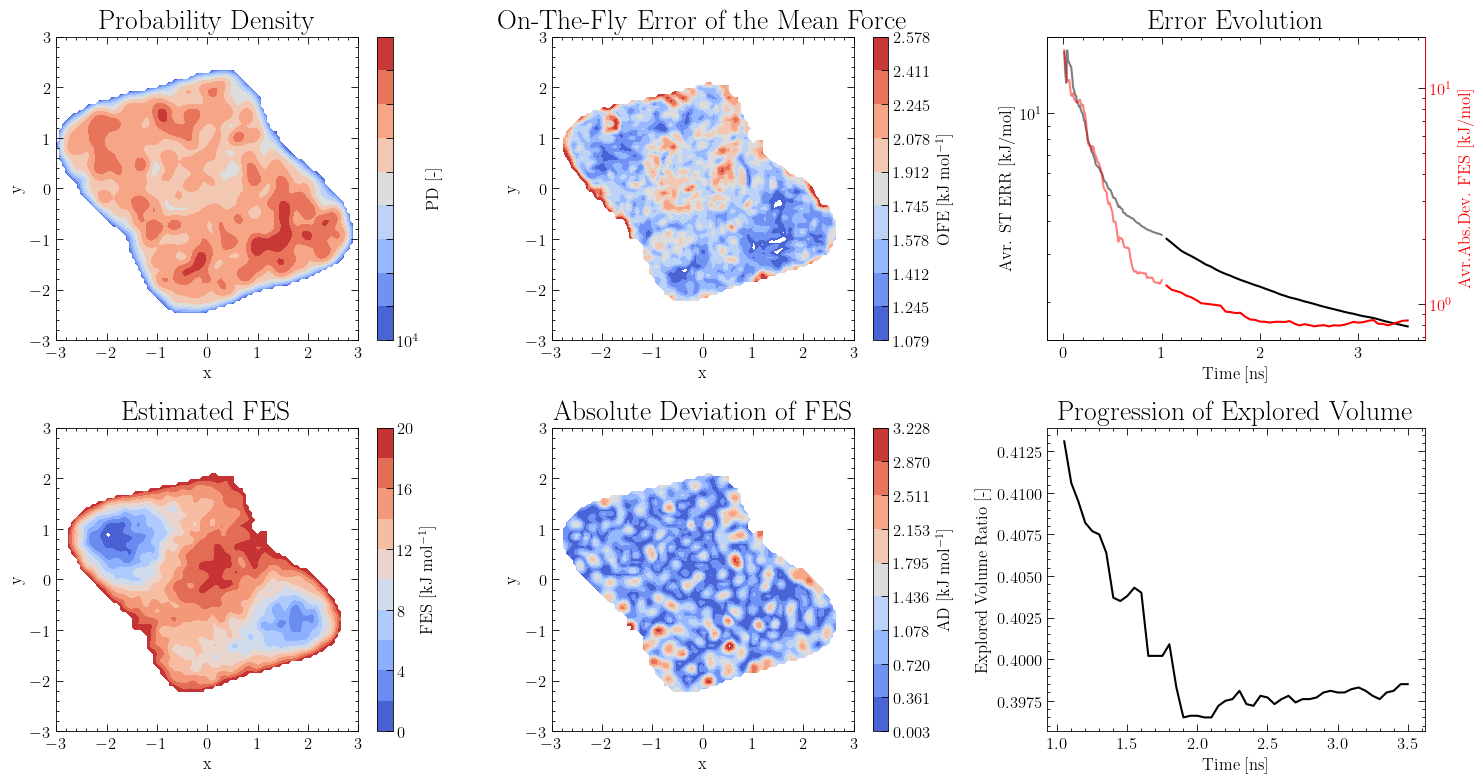

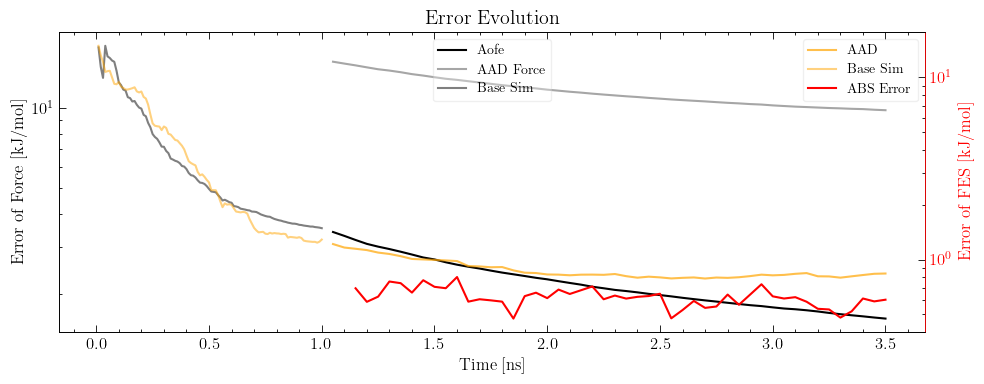

In [8]:
new_params = {**default_params}
new_params.update({"simulation_steps":500_000, "ID":"_inve_2_2"})
new_params.update({"metad_height":2, "biasfactor":3, "metad_width":[0.1, 0.1], "bw":[0.1, 0.1]})
new_params.update({"len_error_list":50, "calculate_FES_st_dev":False, "bootstrap_iter":50})#, "n_pos":10_000})
new_params.update({"base_forces":base_force_terms, "base_time":base_time, "base_forces_e_list":base_forces_e_list})

MFI_2_2 = MFI_class2D.MFI2D(**new_params)

MFI_2_2.make_external_bias(FES=base_fes)

# MFI_2_2.run_simulation()

MFI_2_2.analyse_data()

# lib2.plot_hills_trajectory(MFI_2_2.hills)
MFI_2_2.plot_results(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])
MFI_2_2.plot_errors(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])


#### 3rd simulation

| 100% | AAD: 0.659 [kJ/mol] | Total time: 44 sec                                                            


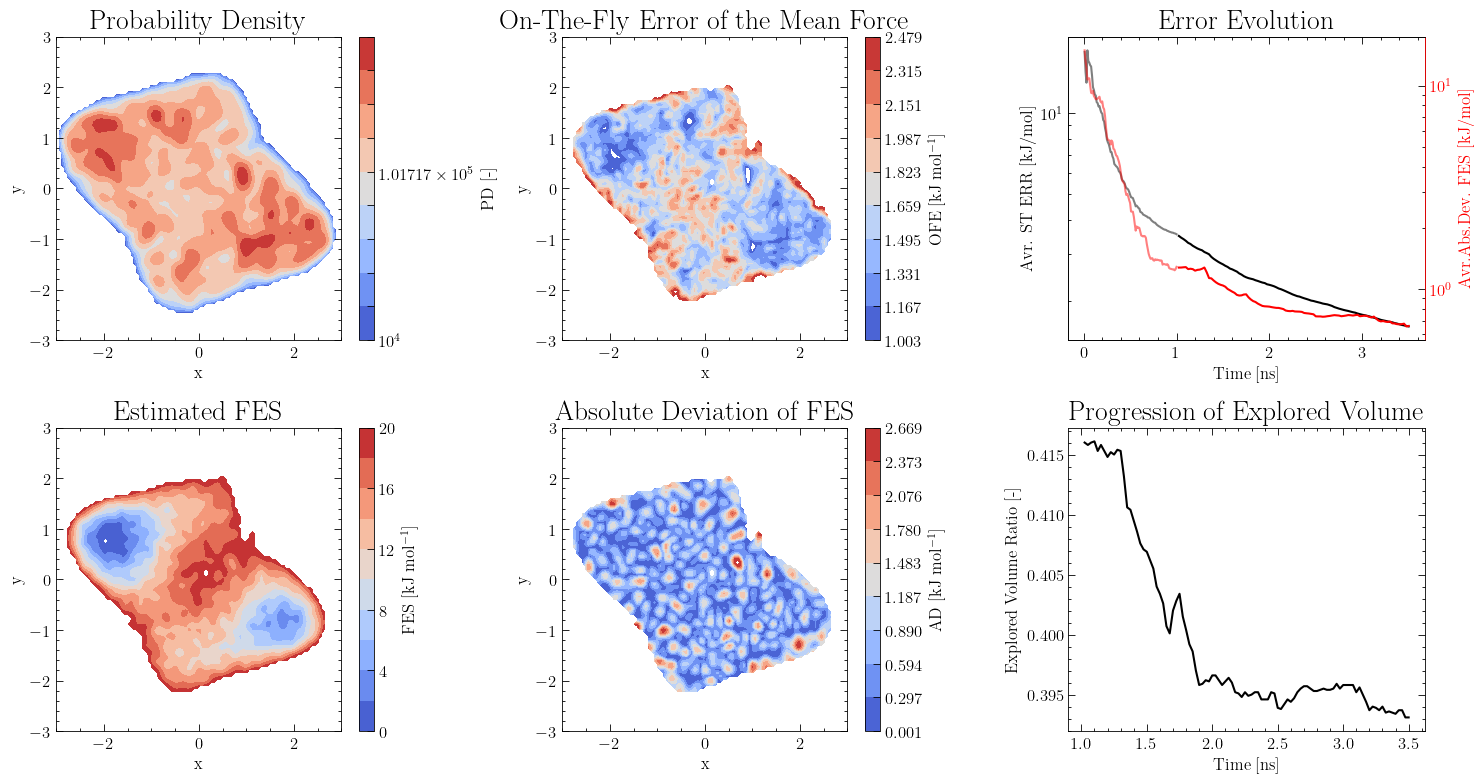

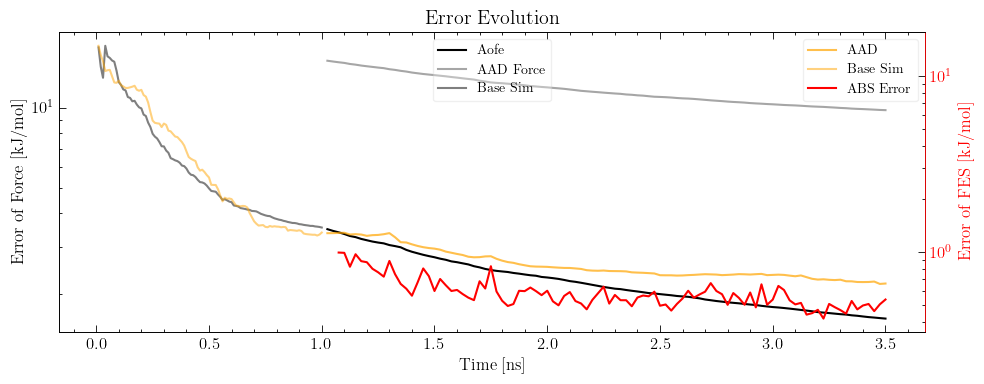

In [9]:
new_params = {**default_params}
new_params.update({"simulation_steps":500_000, "ID":"_inve_2_3"})
new_params.update({"metad_height":1, "biasfactor":3, "metad_width":[0.1, 0.1], "bw":[0.1, 0.1]})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":50})#, "n_pos":10_000})
new_params.update({"base_forces":base_force_terms, "base_time":base_time, "base_forces_e_list":base_forces_e_list})

MFI_2_3 = MFI_class2D.MFI2D(**new_params)

MFI_2_3.make_external_bias(FES=base_fes)

# MFI_2_3.run_simulation()

MFI_2_3.analyse_data()

# lib2.plot_hills_trajectory(MFI_2_2.hills)
MFI_2_3.plot_results(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])
MFI_2_3.plot_errors(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])


### Flat stage

In [12]:
aa = np.concatenate((base_forces_e_list, base_forces_e_list2), axis=0)

print(aa.shape)
print(base_forces_e_list.shape)
print(base_forces_e_list2.shape)

(200, 6, 100, 100)
(100, 6, 100, 100)
(100, 6, 100, 100)


| 100% | AAD: 0.637 [kJ/mol] | Total time: 1.0 min : 19 sec                                                            


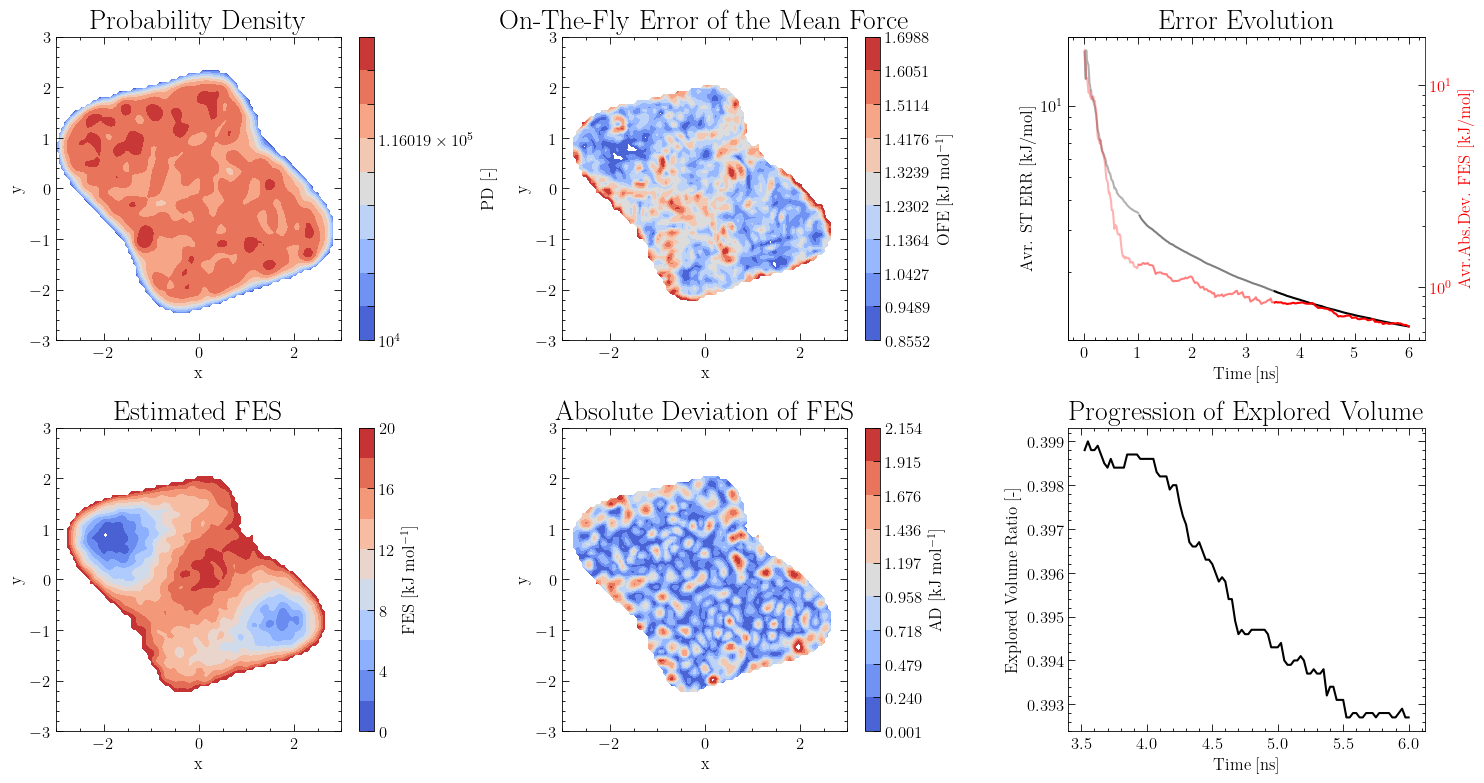

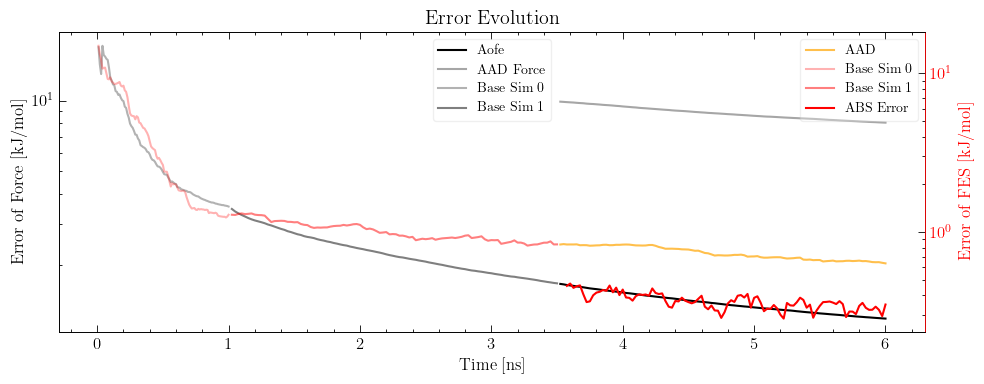

In [11]:
new_params = {**default_params}
new_params.update({"simulation_steps":500_000, "ID":"_inve_3_1"})
new_params.update({"metad_height":1, "biasfactor":3, "metad_width":[0.1, 0.1], "bw":[0.1, 0.1]})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":100})#, "n_pos":10_000})
new_params.update({"base_forces":lib2.patch_forces([base_force_terms, base_force_terms2]), "base_time":base_time + base_time2, "base_forces_e_list": np.concatenate((base_forces_e_list, base_forces_e_list2), axis=0)})

MFI_3_1 = MFI_class2D.MFI2D(**new_params)

MFI_3_1.make_external_bias(FES=base_fes2)

# MFI_3_1.run_simulation()

MFI_3_1.analyse_data()

# lib2.plot_hills_trajectory(MFI_2_1.hills)
MFI_3_1.plot_results(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])
MFI_3_1.plot_errors(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])


| 100% | AAD: 0.658 [kJ/mol] | Total time: 1.0 min : 18 sec                                                            


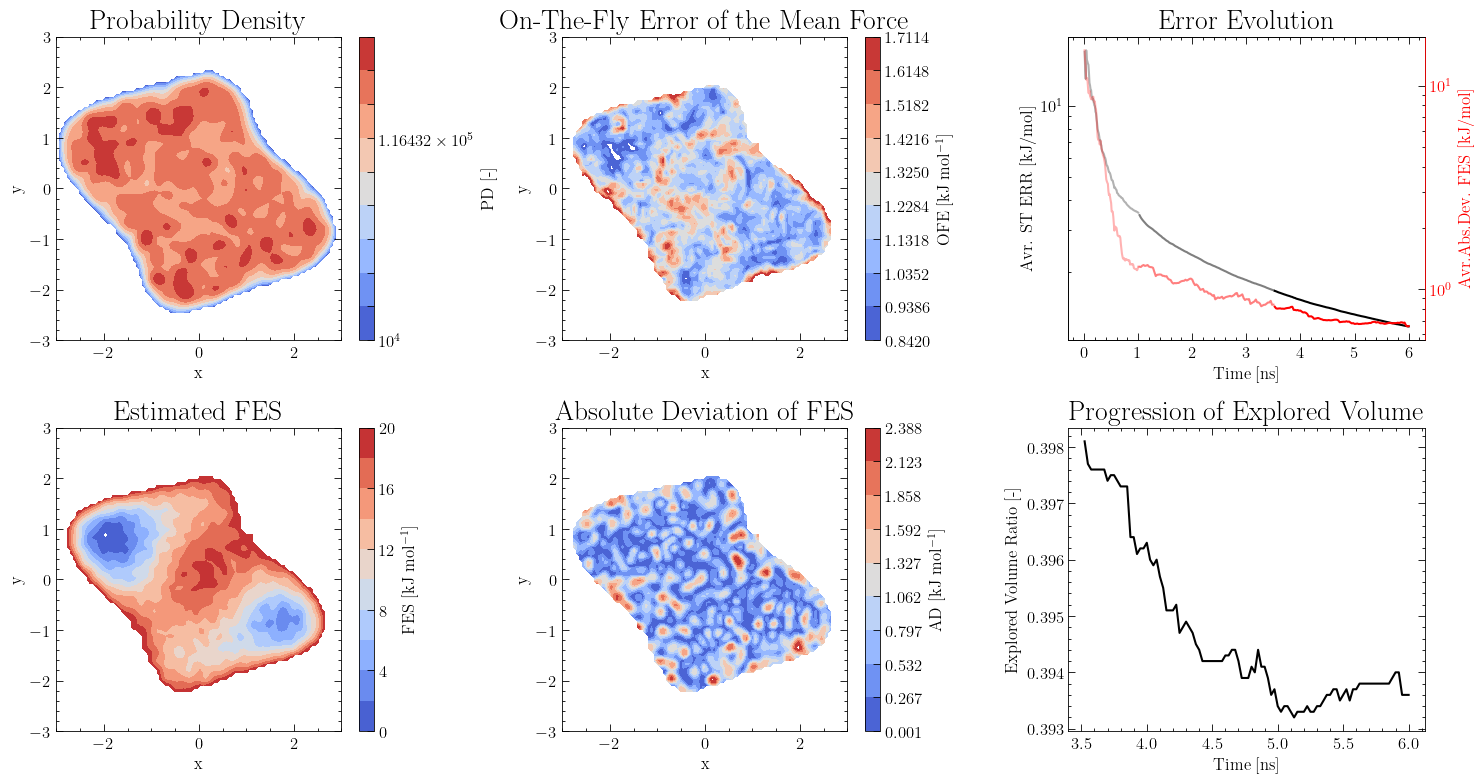

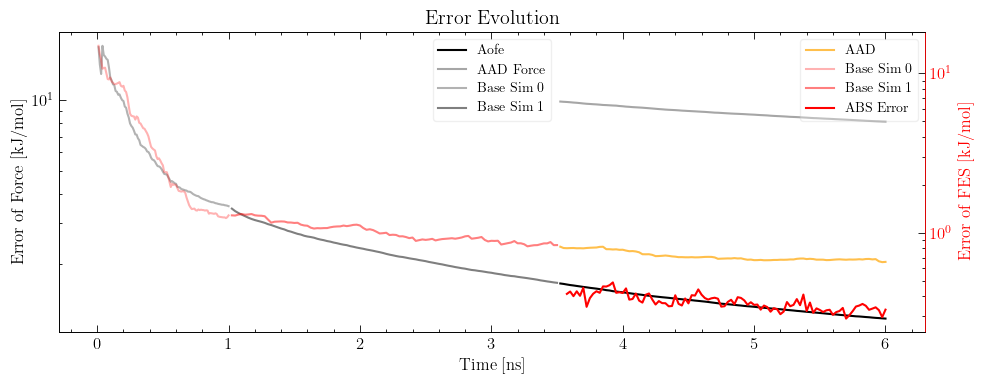

In [14]:
new_params = {**default_params}
new_params.update({"simulation_steps":500_000, "ID":"_inve_3_2"})
new_params.update({"metad_height":0.5, "biasfactor":3, "metad_width":[0.1, 0.1], "bw":[0.1, 0.1]})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":100})#, "n_pos":10_000})
new_params.update({"base_forces":lib2.patch_forces([base_force_terms, base_force_terms2]), "base_time":base_time + base_time2, "base_forces_e_list": np.concatenate((base_forces_e_list, base_forces_e_list2), axis=0)})

MFI_3_2= MFI_class2D.MFI2D(**new_params)

MFI_3_2.make_external_bias(FES=base_fes2)

# MFI_3_2.run_simulation()

MFI_3_2.analyse_data()

# lib2.plot_hills_trajectory(MFI_2_1.hills)
MFI_3_2.plot_results(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])
MFI_3_2.plot_errors(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])



| 100% | AAD: 0.703 [kJ/mol] | Total time: 42 sec                                                            


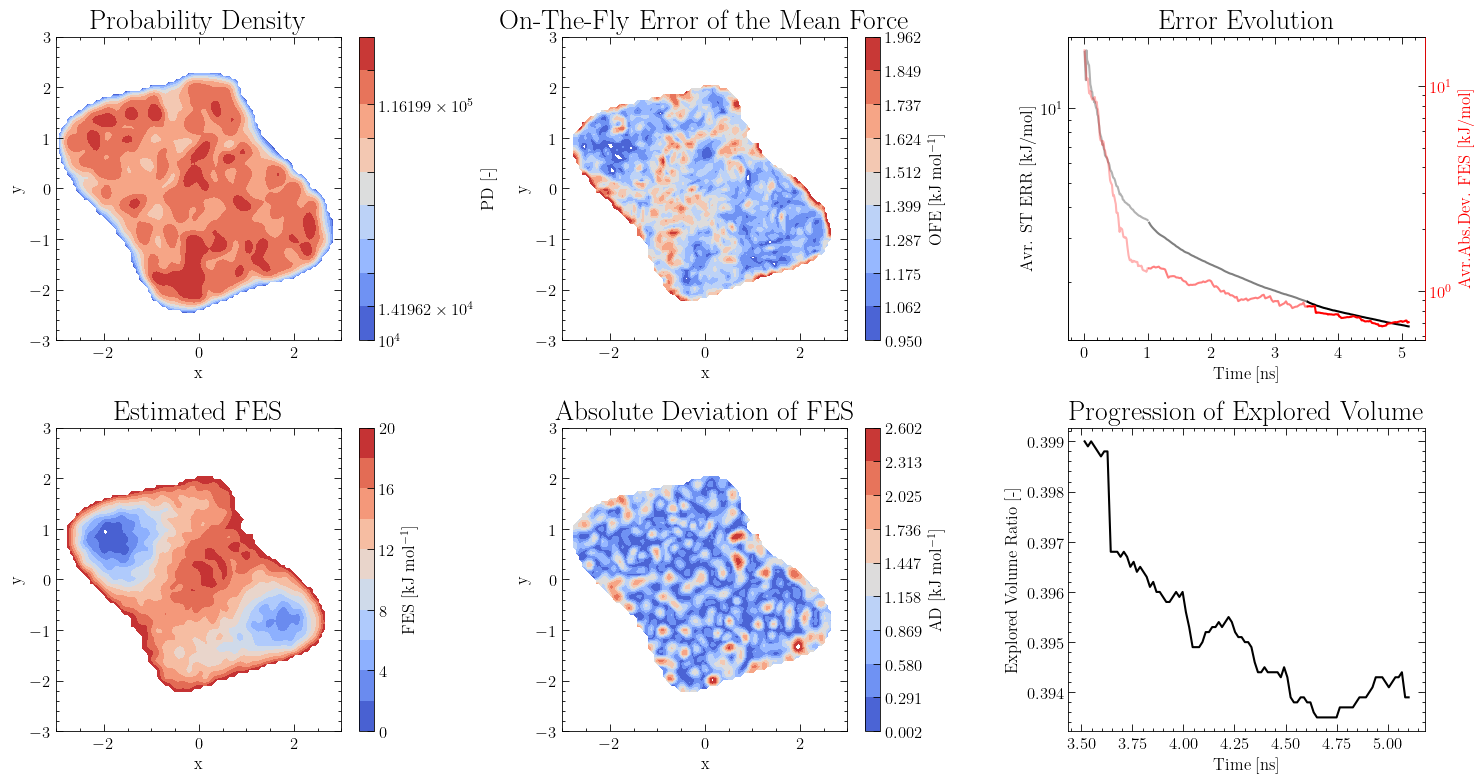

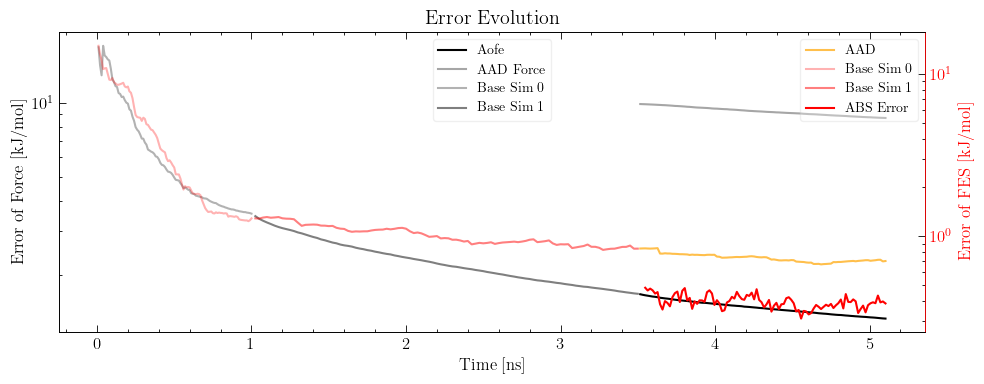

In [16]:
new_params = {**default_params}
new_params.update({"simulation_steps":500_000, "ID":"_inve_3_3"})
new_params.update({"metad_height":2, "biasfactor":3, "metad_width":[0.1, 0.1], "bw":[0.1, 0.1]})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":50})#, "n_pos":10_000})
new_params.update({"base_forces":lib2.patch_forces([base_force_terms, base_force_terms2]), "base_time":base_time + base_time2, "base_forces_e_list": np.concatenate((base_forces_e_list, base_forces_e_list2), axis=0)})

MFI_3_3= MFI_class2D.MFI2D(**new_params)

MFI_3_3.make_external_bias(FES=base_fes2)

# MFI_3_3.run_simulation()

MFI_3_3.analyse_data()

# lib2.plot_hills_trajectory(MFI_2_1.hills)
MFI_3_3.plot_results(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])
MFI_3_3.plot_errors(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])



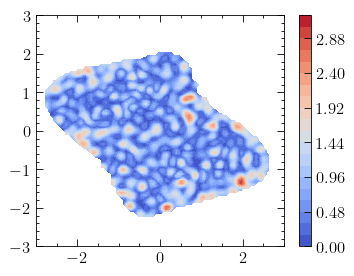

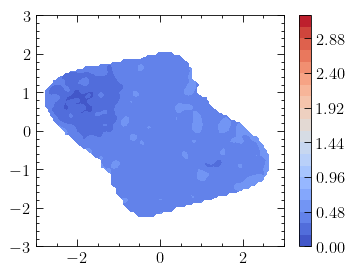

In [22]:
plt.contourf(X, Y, lib2.zero_to_nan(MFI_3_3.AD), levels=np.linspace(0, 3.2, 21), cmap="coolwarm"); plt.colorbar(); plt.show()

plt.contourf(X, Y, lib2.zero_to_nan(MFI_3_3.BS_error), levels=np.linspace(0, 3.2, 21), cmap="coolwarm"); plt.colorbar(); plt.show()

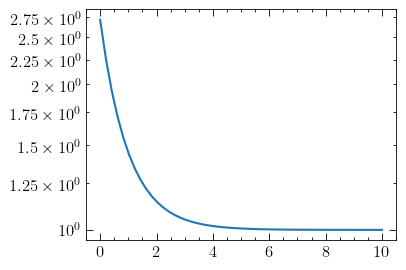

In [34]:
xx = np.linspace(0, 10, 50)
yy = - xx + 1

yy = np.exp(np.exp(-xx))

plt.plot(xx, yy); 
plt.yscale("log")
plt.show()